In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from datetime import datetime
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [2]:
dffilm = pd.read_csv(Path('./Resources/train.csv'))

In [3]:
dffilm.drop(['belongs_to_collection','budget','genres','homepage',
            'imdb_id','spoken_languages','overview','title','poster_path','production_companies',
            'production_countries','original_title','tagline','Keywords','cast','crew'], axis=1, inplace=True)
dffilm.head()

,id,original_language,popularity,release_date,runtime,status,revenue
0,1,en,6.575393,2/20/15,93.0,Released,12314651
1,2,en,8.248895,8/6/04,113.0,Released,95149435
2,3,en,64.299990,10/10/14,105.0,Released,13092000
3,4,hi,3.174936,3/9/12,122.0,Released,16000000
4,5,ko,1.148070,2/5/09,118.0,Released,3923970


0        93.0
1       113.0
2       105.0
3       122.0
4       118.0
        ...  
2995    102.0
2996    102.0
2997    120.0
2998     90.0
2999    106.0
Name: runtime, Length: 3000, dtype: float64

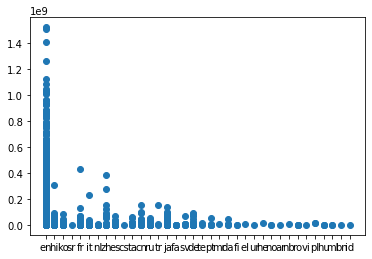

In [4]:
plt.scatter(dffilm.original_language,dffilm.revenue)
dffilm.revenue

In [5]:


X_releasedate =dffilm
for m in range(0,len(dffilm.release_date)):
    film_date = dffilm.release_date[m]
    dt = datetime.strptime(film_date, '%m/%d/%y')
    #dffilm.release_date[m] = datetime_object.timetuple().tm_yday
    X_releasedate.release_date[m]= dt.month
    
for i in range(0,len(dffilm.original_language)):
    if dffilm.original_language[i]== 'en':
        X_releasedate.original_language[i] = 1
    else:
        X_releasedate.original_language[i] = 0
        

for j in range(0,len(dffilm.status)):
    if dffilm.status[j]== 'Released':
        X_releasedate.status[j] = 1
    else:
        X_releasedate.status[j] = 0        
        
X_releasedate

/var/folders/23/mc3swhfd7ts230fqc9_j4xqw0000gn/T/ipykernel_7971/4247714838.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_releasedate.release_date[m]= dt.month
/var/folders/23/mc3swhfd7ts230fqc9_j4xqw0000gn/T/ipykernel_7971/4247714838.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_releasedate.original_language[i] = 1
/var/folders/23/mc3swhfd7ts230fqc9_j4xqw0000gn/T/ipykernel_7971/4247714838.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

,id,original_language,popularity,release_date,runtime,status,revenue
0,1,1,6.575393,2,93.0,1,12314651
1,2,1,8.248895,8,113.0,1,95149435
2,3,1,64.299990,10,105.0,1,13092000
3,4,0,3.174936,3,122.0,1,16000000
4,5,0,1.148070,2,118.0,1,3923970
...,...,...,...,...,...,...,...
2995,2996,1,9.853270,4,102.0,1,1596687
2996,2997,0,3.727996,3,102.0,1,180590
2997,2998,1,14.482345,10,120.0,1,89456761
2998,2999,1,15.725542,1,90.0,1,171963386


In [6]:
X_releasedate['release_date']=X_releasedate.release_date.astype('int64')
X_releasedate['original_language']=X_releasedate.original_language.astype('int64')
X_releasedate['status']=X_releasedate.status.astype('int64')

In [7]:
X = X_releasedate.dropna().copy()


In [8]:

X=y=X_releasedate.dropna()

X.shape
y.shape


(2998, 7)

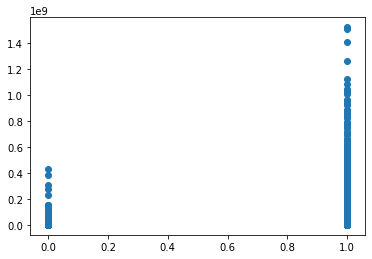

In [9]:
plt.scatter(X.original_language,y.revenue)

In [10]:
X = dffilm.reshape(-1, 1)
X[:5]

AttributeError: 'DataFrame' object has no attribute 'reshape'

In [11]:
X.shape

(2998, 7)

In [12]:
y.shape

(2998, 7)

In [13]:
model = LinearRegression()
model


# Fit the data into the model
model.fit(X, y)

LinearRegression()

In [14]:
# The slope
print(model.coef_)

[[ 1.00000000e+00 -6.85689705e-17  1.14935459e-17  2.07786304e-16
   5.48553161e-17  1.71885581e-14  2.78362957e-18]
 [ 3.42277392e-14  9.99999997e-01  1.39228363e-10  4.61715569e-11
  -9.78188568e-11 -2.47723014e-10 -1.25002151e-18]
 [ 9.72280217e-19  1.02816300e-13  1.00000000e+00  3.98885010e-16
   4.64476680e-16  1.67031060e-15 -1.27110324e-21]
 [ 7.88152245e-19 -5.59658995e-14 -2.78220147e-16  1.00000000e+00
  -8.73679320e-17 -3.13491345e-16  4.17053325e-23]
 [ 3.84412639e-17 -3.54351636e-13 -2.64252902e-15 -4.73272449e-16
   1.00000000e+00 -3.83293927e-16 -2.31345068e-22]
 [ 3.64502682e-21 -8.64848338e-16 -2.23158744e-18 -1.42812053e-17
  -9.47401351e-19  1.00000000e+00  3.28130722e-25]
 [ 8.57529072e-13 -6.92536145e-08  2.04046342e-09 -6.70550361e-10
   1.25384790e-09 -1.30480000e-09  1.00000000e+00]]


In [15]:
# The y-intercept
print(model.intercept_)

[-1.85082172e-10  1.18975466e-08 -6.75015599e-14  5.32907052e-14
  1.13686838e-13  9.99200722e-16 -5.21540642e-08]


In [16]:
# The model creates predicted y values based on X values
predicted_y_values = model.predict(X)
print(predicted_y_values)

[[1.00000000e+00 1.00000000e+00 6.57539300e+00 ... 9.30000000e+01
  1.00000000e+00 1.23146510e+07]
 [2.00000000e+00 9.99999999e-01 8.24889500e+00 ... 1.13000000e+02
  1.00000000e+00 9.51494350e+07]
 [3.00000000e+00 1.00000001e+00 6.42999900e+01 ... 1.05000000e+02
  1.00000000e+00 1.30920000e+07]
 ...
 [2.99800000e+03 9.99999999e-01 1.44823450e+01 ... 1.20000000e+02
  1.00000000e+00 8.94567610e+07]
 [2.99900000e+03 1.00000000e+00 1.57255420e+01 ... 9.00000000e+01
  1.00000000e+00 1.71963386e+08]
 [3.00000000e+03 1.00000000e+00 1.05121090e+01 ... 1.06000000e+02
  1.00000000e+00 8.20871550e+07]]


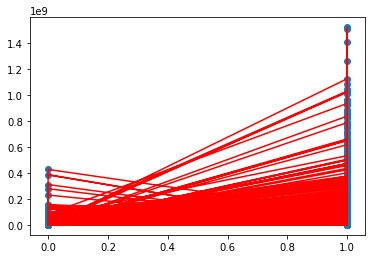

In [19]:
#Plot the results. The best fit line is red.
plt.scatter(X.original_language, y.revenue)
plt.plot(X.original_language,predicted_y_values,color='red')

In [18]:
X=y.drop('revenue',axis=1).copy()
# Splitting into Train and Test sets
#X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=1, stratify=y)
X_train,X_test,y_train,y_test = train_test_split(X, y,random_state=78)

In [11]:
X_test
y_train
y_test

X_train



,id,original_language,popularity,release_date,runtime,status
2629,2630,1,14.657754,3,89.0,1
850,851,1,9.424157,9,121.0,1
1171,1172,1,13.371056,4,92.0,1
1529,1530,1,1.650666,5,111.0,1
830,831,1,2.447359,12,139.0,1
...,...,...,...,...,...,...
2154,2155,0,0.878255,9,99.0,1
40,41,1,2.941626,4,118.0,1
1944,1945,1,7.798615,3,108.0,1
470,471,1,0.079856,9,120.0,1


In [13]:
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [14]:
#Fitting the model
rf_model = rf_model.fit(X_train, y_train.revenue)

In [15]:
predictions = rf_model.predict(X_test)
print(predictions)

[  38290723   23978402    4192440   12923936    6000000  176070171
    2585639   26096852     192816   67918658    9697739   18662027
  108047131  147332697  151165787   68915888  110000000   10785801
   68706993    6174491      46488   23550000  424208848   28744356
  117719158      94633  408247917   55707411   49998613  163442937
    2402067   56505065   15240456  498814908    1000000  227799884
    7338987   39673162     119563   42700000   21621000   13071518
   13071518  160583018     921548    2200000    4491986  128905366
  244527583     495303   20529194    5873871     794452   18000000
     263000    3833507   58620973    3769990    2500000     100544
   50671850   26330482     107559   40346186    7399763    1646788
      12250    4910682   34327391   72266306   60209334      26488
   25000000   56666667   49000000    7227038     120620   29355203
      37884   60722734      31894  102820008   96105964    7000000
     285930    4100000   20957001   33000337   21133087    817

In [17]:
# Calculating the confusion matrix
#cm = confusion_matrix(y_test, predictions)
#cm_df = pd.DataFrame(
 #   cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
#)

# Calculating the accuracy score
acc_score = accuracy_score(y_test.revenue, predictions)




In [18]:
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test.revenue, predictions))

Accuracy Score : 0.0026666666666666666
Classification Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         1
          30       0.00      0.00      0.00         1
          32       0.00      0.00      0.00         0
          79       0.00      0.00      0.00         1
          85       0.00      0.00      0.00         1
          88       0.00      0.00      0.00         1
          97       0.00      0.00      0.00         1
         121       0.00      0.00      0.00         1
         125       0.00      0.00      0.00         0
         126       0

/Users/vikramjindal/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vikramjindal/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vikramjindal/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users

In [13]:
#X_train.dtypes
#X_test
#y_train
#y_test
X.dtypes

id                     int64
original_language      int64
popularity           float64
release_date           int64
runtime              float64
status                 int64
dtype: object

In [14]:
# Creating StandardScaler instance
#scaler = StandardScaler()

In [15]:
# Fitting Standard Scaller
#X_scaler = scaler.fit(X_train)

In [16]:
from xgboost import XGBRegressor
regressor = XGBRegressor(colsample_bytree= 0.6, gamma= 0.7, max_depth= 4, min_child_weight= 5,
                         subsample = 0.8, objective='reg:squarederror')
regressor.fit(X, y)

y_pred = regressor.predict(X_test)
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured revenue')
ax.set_ylabel('Predicted revenue')
plt.title('Measured versus predicted revenue')
plt.ylim((50000000, 300000000))   # set the ylim to bottom, top
plt.xlim(50000000, 300000000)     # set the ylim to bottom, top
plt.show()

AssertionError: 

In [17]:
X

,id,original_language,popularity,release_date,runtime,status
0,1,1,6.575393,2,93.0,1
1,2,1,8.248895,8,113.0,1
2,3,1,64.299990,10,105.0,1
3,4,0,3.174936,3,122.0,1
4,5,0,1.148070,2,118.0,1
...,...,...,...,...,...,...
2995,2996,1,9.853270,4,102.0,1
2996,2997,0,3.727996,3,102.0,1
2997,2998,1,14.482345,10,120.0,1
2998,2999,1,15.725542,1,90.0,1


In [18]:
y

,id,original_language,popularity,release_date,runtime,status,revenue
0,1,1,6.575393,2,93.0,1,12314651
1,2,1,8.248895,8,113.0,1,95149435
2,3,1,64.299990,10,105.0,1,13092000
3,4,0,3.174936,3,122.0,1,16000000
4,5,0,1.148070,2,118.0,1,3923970
...,...,...,...,...,...,...,...
2995,2996,1,9.853270,4,102.0,1,1596687
2996,2997,0,3.727996,3,102.0,1,180590
2997,2998,1,14.482345,10,120.0,1,89456761
2998,2999,1,15.725542,1,90.0,1,171963386


[ 1.13686838e-12 -2.12052598e-14 -1.42108547e-14  7.10542736e-15
 -9.94759830e-14  5.55111512e-16 -1.39440277e+08]


/var/folders/23/mc3swhfd7ts230fqc9_j4xqw0000gn/T/ipykernel_6924/311925838.py:3: MatplotlibDeprecationWarning: cycling among columns of inputs with non-matching shapes is deprecated.
  plt.plot(X,predicted_y_values,color='red')


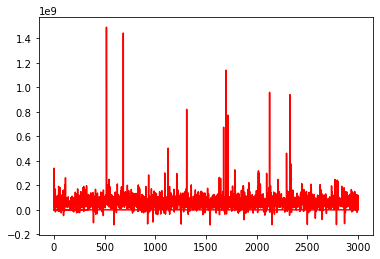

In [26]:
# 

In [29]:
dffilm['status'].describe()

count    3000.000000
mean        0.998667
std         0.036497
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: status, dtype: float64